# **EXERCISES 5**

### _Coded by Alperen KAÇMAZ_


## _10 SciPy_

### Exercise 10.1: Least squares

Generate matrix A ∈ Rm×n with m > n. Also generate some vector b ∈ Rm.

- Now find x = arg minx kAx − bk2.
- Print the norm of the residual.


In [15]:
from scipy.optimize import least_squares as ls
import numpy as np


def finder(A: np.array):
    return np.argmin(A)


A = np.array([[6, 6, 3], [40, 40, 20]]).T
b = np.array([0.5, 0.2, 0.6])
sol = ls(finder, b)
print(sol)


 active_mask: array([0., 0., 0.])
        cost: 0.5
         fun: array([1], dtype=int64)
        grad: array([0., 0., 0.])
         jac: array([[0., 0., 0.]])
     message: '`gtol` termination condition is satisfied.'
        nfev: 1
        njev: 1
  optimality: 0.0
      status: 1
     success: True
           x: array([0.5, 0.2, 0.6])


### Exercise 10.2: Optimization

Find the maximum of the function

- $f(x) = sin^{2}(x − 2) e^{-x^2}$


In [22]:
from scipy import e, optimize


def func(x: int):
    """
    Args:
        x (int): variable of the function

    Returns:
        float: function
    """
    return (np.sin(x-2)**2) * (e**-x**2)


# use the fmin but not find the min value, make a lambda func that takes -func.
sol = optimize.fmin(lambda x: -func(x), 0)
print(sol)


Optimization terminated successfully.
         Current function value: -0.911685
         Iterations: 20
         Function evaluations: 40
[0.21625]


### Exercise 10.3: Pairwise distances

Let `X` be a matrix with $n$ rows and $m$ columns. How can you compute the pairwise distances between every two rows?

As an example application, consider $n$ cities, and we are given their coordinates in two columns.

- Now we want a nice table that tells us for each two cities, how far they are apart.

- Again, make sure you make use of Scipy’s functionality instead of writing your own routine.


In [31]:
from scipy.spatial.distance import cdist, pdist
X = np.random.randint(1, 100, size=(4, 8))

print(str(X)+'\n')
print(str(cdist(X, X, 'euclid'))+'\n')
print(pdist(X, 'euclid'))


[[ 6  8 56 94 25 39 89 88]
 [80 31  2 29 83 16 48 29]
 [30 68 34 66 46 83 71 55]
 [33 44 48 17 59 46 97 13]]

[[  0.         149.          96.09370427 122.11470018]
 [149.           0.         115.43396381  93.65361712]
 [ 96.09370427 115.43396381   0.          84.61678321]
 [122.11470018  93.65361712  84.61678321   0.        ]]

[149.          96.09370427 122.11470018 115.43396381  93.65361712
  84.61678321]


## _11 Matplotlib_


### Exercise 11.1: Plotting a function

Plot the function

- $f(x) = sin^{2}(x − 2)e^{−x^2}$
- over the interval [0, 2]. Add proper axis labels, a title, etc.


Text(0, 0.5, 'output value')

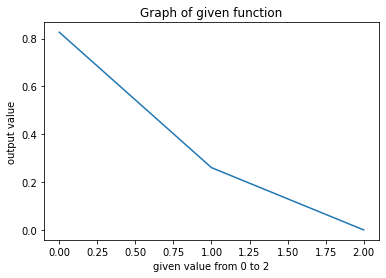

In [37]:
import matplotlib.pyplot as plt


def func(x: int):
    """
    Args:
        x (int): variable of the function

    Returns:
        float: function
    """
    return (np.sin(x-2)**2) * (e**-x**2)


vals = list()
for i in range(0, 3):
    vals.append(func(i))

plt.plot(vals)
plt.title('Graph of given function')
plt.xlabel('given value from 0 to 2')
plt.ylabel('output value')


### Exercise 11.2: Data

Create a data matrix $X$ with 20 observations of 10 variables. Generate a vector $b$ with parameters
Then generate the response vector `y = Xb+z` where $z$ is a vector with standard normally distributed variables.

Now (by only using $y$ and $X$), find an estimator for $b$, by solving

- $b^ˆ = argmin_{b} ||Xb − y||_{2}$
- Plot the true parameters $b$ and estimated parameters $ˆb$. See Figure 1 for an example plot.


In [43]:
X = np.random.randint(0, 100, size=(10, 20))
# b = np.random.randint(0, 100, size=(1, 20))
b = list()
for i in X:
    mean = sum(i)/len(i)
    std = (sum([((x - mean) ** 2) for x in i]) / len(i))**0.5
    z = np.random.normal(mean, std, 1000)
    print(z)
print(b)


[ 2.24896238e+01  4.68196207e+01  4.78747224e+01  1.50122487e+01
  1.01719014e+02  8.15362126e+01  7.81690853e+01  7.82888597e+01
  8.61915760e+00  7.21188000e+01  5.52474787e+01  1.28721107e+01
  1.21709963e+01  6.68061154e+01  5.31087339e+01  1.15521545e+02
  2.47451057e+01  4.39294131e+01  1.79528380e+01  1.03103935e+02
  5.84650677e+01  7.44006833e+01  2.54880240e+01  1.23013119e+02
  3.69629782e+01  6.54644728e+01  8.42353129e+01  6.78307577e+01
  2.53237141e+01  1.17473823e+02  7.94397235e+01  7.42147710e+01
  1.42880230e+01  3.42471723e+01  4.36313274e+00  8.44545683e+01
  4.91883082e+01  7.99146100e+01  5.72362996e+01  1.08923807e+01
  1.01030958e+02  6.43717777e+01  7.50672627e+01  5.34201794e+01
  5.61674436e+01  8.12805010e+01  5.53535181e+01  6.43182975e+01
  3.91095425e+01  5.90308421e+01  5.63201190e+01  4.24772454e+01
  5.73820527e+01  3.89976639e+01  8.28593612e+01  1.74556437e+01
  3.78756980e+01  2.24739068e+01  8.11540903e+01  6.51094290e+01
  3.61349018e+01  3.31462

### Exercise 11.3: Histogram and density estimation

- Generate a vector z of 10000 observations from your favorite exotic distribution.

- Then make a plot that shows a histogram of z (with 25 bins), along with an estimate for the density, using a Gaussian kernel density estimator (see scipy.stats).

- See Figure 2 for an example plot.


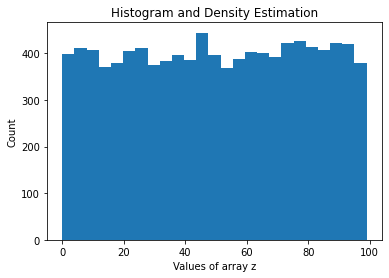

In [37]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

z = np.random.randint(0, 100, size=(10000))
density = stats.gaussian_kde(z)

hist = plt.hist(z, bins=25)
plt.title('Histogram and Density Estimation')
plt.xlabel('Values of array z')
plt.ylabel('Count')
plt.show()
